Author : Clara Martinez

**Scipy and Basic Statistics**

In [1]:
import numpy as np
from scipy import integrate

# Define a simple function
def integrand(x):
    return x**2

# Compute the integral of the function
result, _ = integrate.quad(integrand, 0, 1)
print("Integral of x^2 from 0 to 1:", result)

Integral of x^2 from 0 to 1: 0.33333333333333337


*Exercice Compare Numpy and Scipy*

In [2]:
import numpy as np
import scipy.stats as stats
import time

Data

In [3]:
large_array = np.random.rand(10**6)

Compute mean and standard deviation using NumPy

In [4]:
start_time = time.time()
numpy_mean = np.mean(large_array)
numpy_std = np.std(large_array)
numpy_time = time.time() - start_time

print(f"NumPy Mean: {numpy_mean}, NumPy Std: {numpy_std}")
print(f"NumPy Execution Time: {numpy_time:.6f} seconds")

NumPy Mean: 0.4997187109670492, NumPy Std: 0.28865433920044187
NumPy Execution Time: 0.028300 seconds


Compute mean and standard deviation using SciPy

In [5]:
start_time = time.time()
scipy_mean = stats.tmean(large_array)
scipy_std = stats.tstd(large_array)
scipy_time = time.time() - start_time

print(f"SciPy Mean: {scipy_mean}, SciPy Std: {scipy_std}")
print(f"SciPy Execution Time: {scipy_time:.6f} seconds")

SciPy Mean: 0.4997187109670492, SciPy Std: 0.2886544835277197
SciPy Execution Time: 0.014078 seconds


Compare results

In [6]:
mean_difference = abs(numpy_mean - scipy_mean)
std_difference = abs(numpy_std - scipy_std)

print(f"Difference in Mean: {mean_difference}")
print(f"Difference in Std: {std_difference}")

Difference in Mean: 0.0
Difference in Std: 1.4432727785118615e-07


*Exercise: Analyzing a Real-World Dataset*

Library importations and data generation

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Simulating stock prices for a non-existent stock (DVLPRS)
np.random.seed(0)  # For reproducibility

# Generating 100 days of stock prices
dates = pd.date_range(start='2023-01-01', periods=100)
prices = np.random.normal(loc=100, scale=10, size=len(dates))  # Mean price of 100, std dev of 10

# Creating a DataFrame
stock_data = pd.DataFrame({
    'Date': dates,
    'DVLPRS_Price': prices
})

# Displaying the first few rows of the simulated data
print("First few rows of the dataset:\n", stock_data.head())


First few rows of the dataset:
         Date  DVLPRS_Price
0 2023-01-01    117.640523
1 2023-01-02    104.001572
2 2023-01-03    109.787380
3 2023-01-04    122.408932
4 2023-01-05    118.675580


Convert the 'DVLPRS_Price' column to a NumPy array

In [22]:
price_array = stock_data['DVLPRS_Price'].to_numpy()

Statistics

In [23]:
mean_price = stats.tmean(price_array)
median_price = np.median(price_array)  # SciPy does not have a direct median function, so we use NumPy
variance_price = stats.tvar(price_array)
std_dev_price = stats.tstd(price_array)
skewness_price = stats.skew(price_array)
kurtosis_price = stats.kurtosis(price_array)

In [24]:
print(f"\nMean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Variance of Price: {variance_price:.2f}")
print(f"Standard Deviation of Price: {std_dev_price:.2f}")
print(f"Skewness of Price: {skewness_price:.2f}")
print(f"Kurtosis of Price: {kurtosis_price:.2f}")


Mean Price: 100.60
Median Price: 100.94
Variance of Price: 102.61
Standard Deviation of Price: 10.13
Skewness of Price: 0.01
Kurtosis of Price: -0.38


Interpretation


The analysis of the stock prices over the 100-day period reveals several key insights into the distribution and behavior of the data. The mean price of 100.60 suggests that, on average, the stock price hovers slightly above 100, aligning with the initial simulation parameters. The median price of 100.94, being close to the mean, indicates a fairly symmetric distribution of prices, with minimal skewness. This symmetry is further supported by the skewness value of 0.01, which is nearly zero, suggesting that the data is evenly distributed around the mean without significant skew to either side. The variance of 102.61 and the standard deviation of 10.13 reflect moderate volatility, indicating that the stock price typically fluctuates by about 10 units from the mean. This level of volatility is expected given the simulation's standard deviation parameter and suggests a moderate level of risk. The kurtosis of -0.38 indicates a slightly platykurtic distribution, meaning the data has lighter tails and a flatter peak compared to a normal distribution, with fewer extreme values or outliers. Overall, the stock prices exhibit a stable pattern with predictable movements, making the stock potentially appealing to risk-averse investors who prioritize stability over high volatility. This analysis provides a comprehensive understanding of the stock's risk and return characteristics, offering valuable insights for financial decision-making.

Visualisation

In [30]:
# Prepare data for visualization
stats_labels = ['Mean', 'Median', 'Variance', 'Std Dev', 'Skewness', 'Kurtosis']
stats_values = [mean_price, median_price, variance_price, std_dev_price, skewness_price, kurtosis_price]

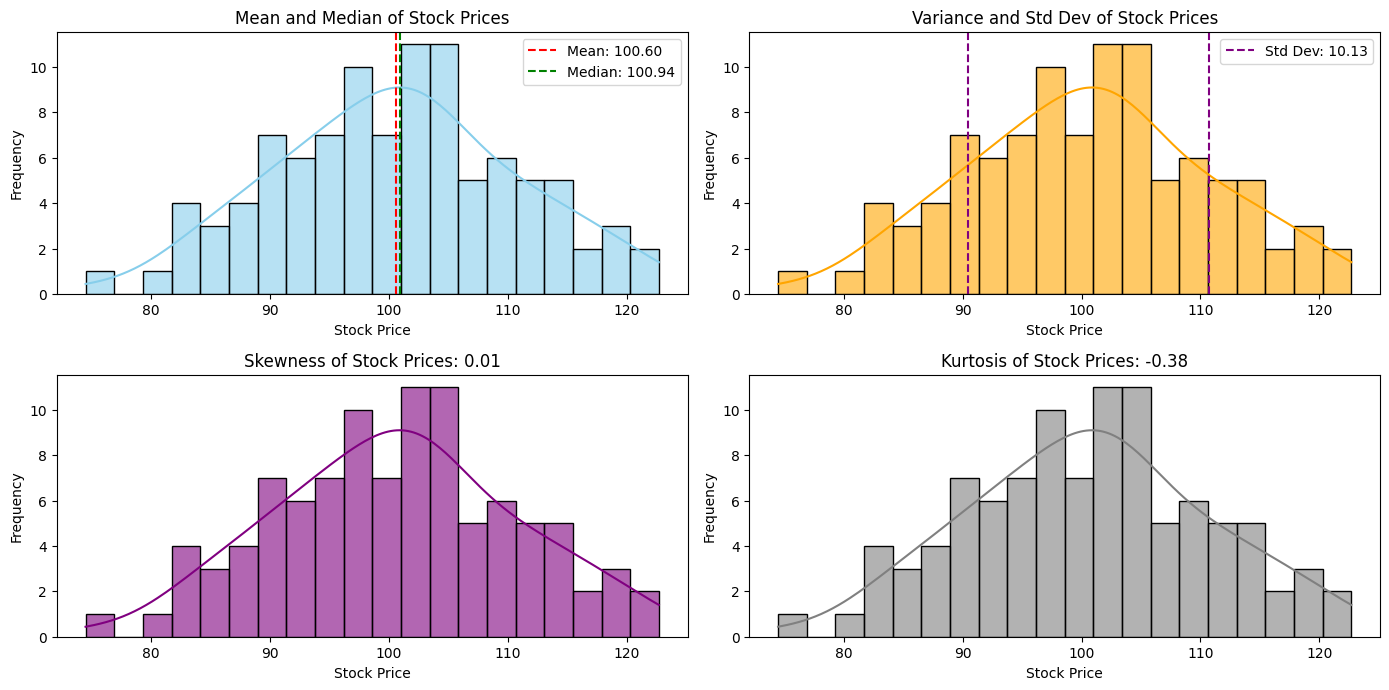

In [31]:
plt.figure(figsize=(14, 10))

# Plot for Mean and Median
plt.subplot(3, 2, 1)
sns.histplot(price_array, bins=20, kde=True, color='skyblue', alpha=0.6)
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', label=f'Median: {median_price:.2f}')
plt.title('Mean and Median of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.legend()

# Plot for Variance and Standard Deviation
plt.subplot(3, 2, 2)
sns.histplot(price_array, bins=20, kde=True, color='orange', alpha=0.6)
plt.axvline(mean_price - std_dev_price, color='purple', linestyle='--', label=f'Std Dev: {std_dev_price:.2f}')
plt.axvline(mean_price + std_dev_price, color='purple', linestyle='--')
plt.title('Variance and Std Dev of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.legend()

# Plot for Skewness
plt.subplot(3, 2, 3)
sns.histplot(price_array, bins=20, kde=True, color='purple', alpha=0.6)
plt.title(f'Skewness of Stock Prices: {skewness_price:.2f}')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')

# Plot for Kurtosis
plt.subplot(3, 2, 4)
sns.histplot(price_array, bins=20, kde=True, color='grey', alpha=0.6)
plt.title(f'Kurtosis of Stock Prices: {kurtosis_price:.2f}')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [38]:
# Creating a NumPy array of dates for January 2023
dates = np.array(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', 
                  '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', 
                  '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15', 
                  '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', 
                  '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', 
                  '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30', 
                  '2023-01-31'], dtype='datetime64[D]')

**Daily Challenge**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enhancing default style of Matplotlib and Seaborn
plt.style.use('ggplot')
sns.set(style="whitegrid")

Exploration

In [44]:
# Import the dataset
data = pd.read_csv('global_power_plant_database.csv')

# Initial exploration of data
initial_inspection = data.head()

C:\Users\moonb\AppData\Local\Temp\ipykernel_51068\3420033589.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('global_power_plant_database.csv')


In [45]:
initial_inspection

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [ ]:
data = data.drop(columns='other_fuel3')

Data Cleaning

Handling missing values with advanced techniques -> Nan

In [ ]:
# Imputing missing values based on data distribution, data type, and relevance
# For numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
# For categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Converting relevant columns to appropriate data types
# Example: data['column_name'] = pd.to_numeric(data['column_name'], errors='coerce')

In [ ]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,Oil,Gas,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,Oil,Gas,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,Oil,Gas,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,Oil,Gas,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,Oil,Gas,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


Statistics

In [ ]:
detailed_summary = data.describe(include='all')
detailed_summary

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
count,34936,34936,34936,34936,34936.000000,34936.000000,34936.000000,34936,34936,34936,...,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936,34936,34936,34936,34936
unique,167,167,34528,34936,NaN,NaN,NaN,15,12,11,...,NaN,NaN,NaN,NaN,NaN,5,5,5,5,6
top,USA,United States of America,Santo Antônio,GEODB0040538,NaN,NaN,NaN,Solar,Oil,Gas,...,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
freq,9833,9833,6,1,NaN,NaN,NaN,10665,34161,34760,...,NaN,NaN,NaN,NaN,NaN,18816,18433,17886,17366,14942
mean,NaN,NaN,NaN,NaN,163.355148,32.816637,-6.972803,NaN,NaN,NaN,...,125.205717,129.424463,128.846972,132.232824,681.505825,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,489.636072,22.638603,78.405850,NaN,NaN,NaN,...,816.018694,890.157657,891.256782,899.269378,2424.229996,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,-77.847000,-179.977700,NaN,NaN,NaN,...,1.120000,0.870000,0.440000,0.300000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,29.256475,-77.641550,NaN,NaN,NaN,...,27.620000,28.250000,26.830000,27.067500,8.960000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,16.745000,39.727750,-2.127100,NaN,NaN,NaN,...,27.620000,28.250000,26.830000,27.555000,37.590000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,75.344250,46.263125,49.502675,NaN,NaN,NaN,...,27.620000,28.250000,26.830000,28.040000,195.640000,NaN,NaN,NaN,NaN,NaN


Using Numpy

In [49]:
# Print column names to verify
print("Column Names:", data.columns)

Column Names: Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')


In [50]:
# Ensure only numeric columns are used for correlation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

In [51]:
correlation_matrix

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
capacity_mw,1.000000,-0.013218,0.151525,-0.013907,0.042427,0.829836,0.830394,0.843868,0.844018,0.843724,0.832101,0.854440,0.965684,0.975443,0.973716,0.977699,0.948944
latitude,-0.013218,1.000000,-0.068354,-0.152208,0.404759,-0.073264,-0.097511,-0.036456,-0.026028,-0.038374,-0.106488,-0.089446,-0.049291,-0.054559,-0.050669,-0.041935,-0.021642
longitude,0.151525,-0.068354,1.000000,-0.023694,-0.180222,0.050715,0.168033,0.195560,0.189760,0.219294,0.182328,0.033785,0.011608,0.018714,0.026318,0.032031,0.143424
commissioning_year,-0.013907,-0.152208,-0.023694,1.000000,-0.062550,-0.024252,-0.009102,-0.014604,-0.027053,-0.038161,-0.040458,-0.076440,0.027158,0.021220,0.007903,-0.001988,-0.003472
year_of_capacity_data,0.042427,0.404759,-0.180222,-0.062550,1.000000,NaN,NaN,-0.004263,-0.002980,-0.023206,NaN,NaN,-0.012168,-0.020234,-0.027688,-0.029639,0.024533
generation_gwh_2013,0.829836,-0.073264,0.050715,-0.024252,NaN,1.000000,0.961033,0.947375,0.920319,0.933571,0.914561,0.907461,0.938025,0.936601,0.934127,0.938764,0.912140
generation_gwh_2014,0.830394,-0.097511,0.168033,-0.009102,NaN,0.961033,1.000000,0.970274,0.945466,0.933094,0.931470,0.911333,0.886886,0.890112,0.898785,0.884195,0.905502
generation_gwh_2015,0.843868,-0.036456,0.195560,-0.014604,-0.004263,0.947375,0.970274,1.000000,0.971594,0.958868,0.954090,0.935197,0.857970,0.857936,0.875488,0.859679,0.915058
generation_gwh_2016,0.844018,-0.026028,0.189760,-0.027053,-0.002980,0.920319,0.945466,0.971594,1.000000,0.975514,0.963048,0.934432,0.870225,0.872420,0.878655,0.878668,0.914637
generation_gwh_2017,0.843724,-0.038374,0.219294,-0.038161,-0.023206,0.933571,0.933094,0.958868,0.975514,1.000000,0.969475,0.941153,0.855636,0.863155,0.879601,0.868540,0.916473


In [52]:
# Grouped statistics by primary fuel
mean_output = data.groupby('primary_fuel')['capacity_mw'].mean()
median_output = data.groupby('primary_fuel')['capacity_mw'].median()
std_output = data.groupby('primary_fuel')['capacity_mw'].std()

In [53]:
mean_output
median_output
std_output

primary_fuel
Biomass             39.461805
Coal               888.187187
Cogeneration       283.428252
Gas                560.934146
Geothermal         114.640890
Hydro              549.809328
Nuclear           1303.509273
Oil                392.009039
Other              145.891392
Petcoke            476.986459
Solar               41.939412
Storage             35.574631
Waste               20.582503
Wave and Tidal     101.440708
Wind               106.138355
Name: capacity_mw, dtype: float64

Visualisation

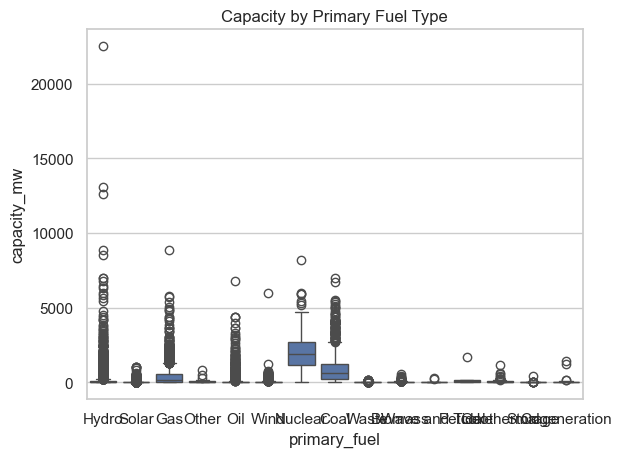

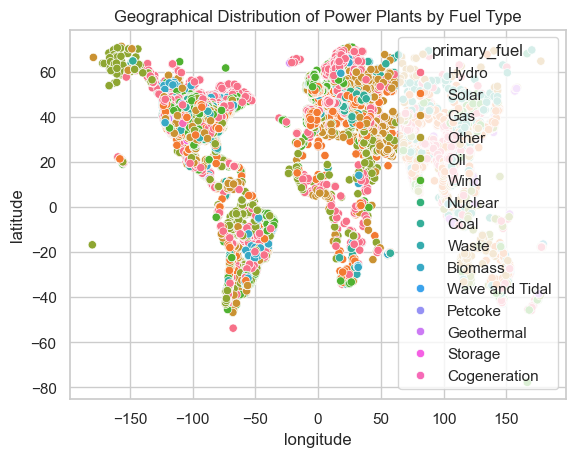

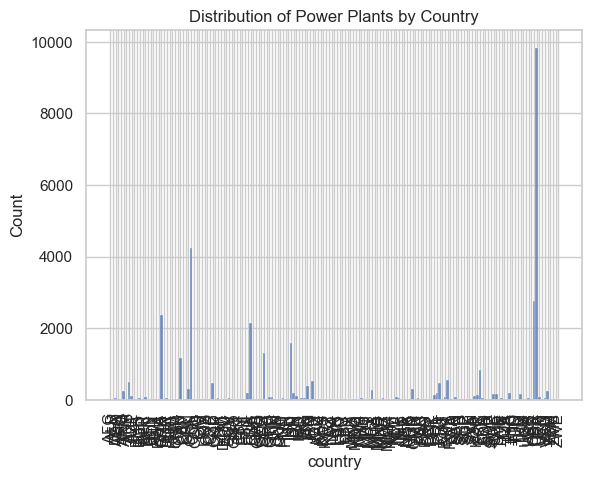

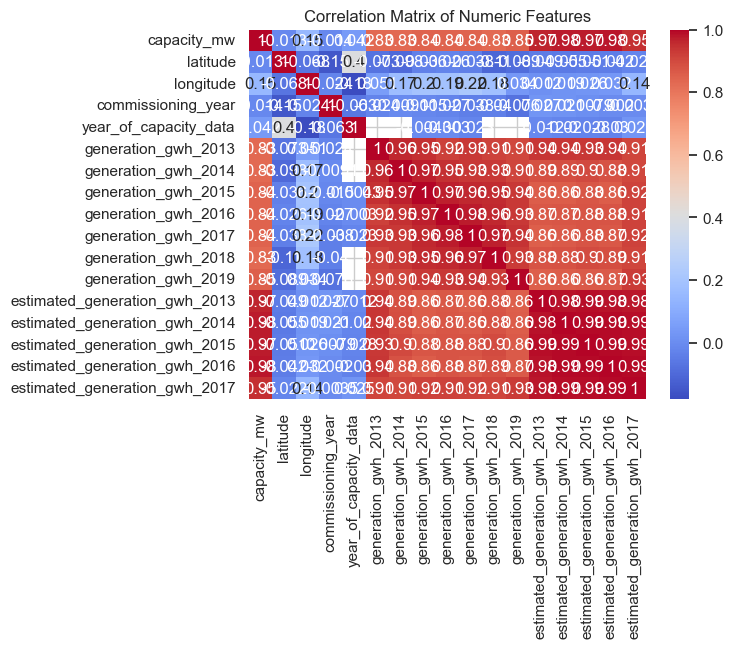

In [55]:
sns.boxplot(x='primary_fuel', y='capacity_mw', data=data)
plt.title('Capacity by Primary Fuel Type')
plt.show()

sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', data=data)
plt.title('Geographical Distribution of Power Plants by Fuel Type')
plt.show()

sns.histplot(data['country'], bins=30)
plt.title('Distribution of Power Plants by Country')
plt.xticks(rotation=90)
plt.show()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Hypothesis testing

In [56]:
coal_output = data[data['primary_fuel'] == 'Coal']['capacity_mw']
gas_output = data[data['primary_fuel'] == 'Gas']['capacity_mw']
t_stat, p_value = ttest_ind(coal_output.dropna(), gas_output.dropna())
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 25.788324829336716, P-value: 1.5774516338525773e-139


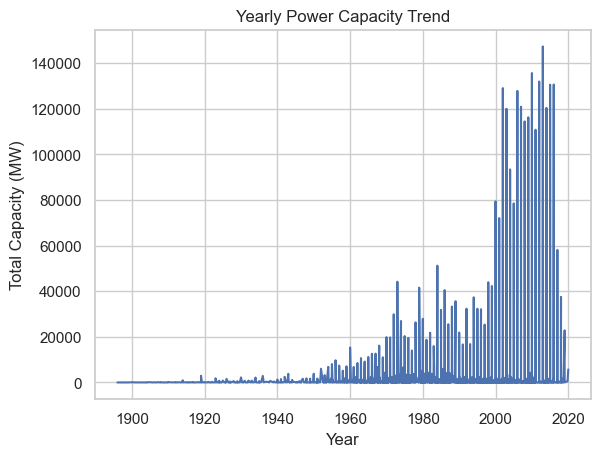

In [57]:
# Time series analysis if applicable
if 'commissioning_year' in data.columns:
    data['commissioning_year'] = pd.to_numeric(data['commissioning_year'], errors='coerce')
    yearly_trend = data.groupby('commissioning_year')['capacity_mw'].sum()
    yearly_trend.plot()
    plt.title('Yearly Power Capacity Trend')
    plt.xlabel('Year')
    plt.ylabel('Total Capacity (MW)')
    plt.show()

Exercice T-test

In [76]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, t

*Load Iris dataset*

In [71]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [77]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Extract petal lengths for Setosa and Versicolor

In [72]:
setosa_petal_length = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']

T-test

In [73]:
t_stat, p_val = ttest_ind(setosa_petal_length, versicolor_petal_length)
print("Iris Petal Length Comparison: T-statistic =", t_stat, "P-value =", p_val)

Iris Petal Length Comparison: T-statistic = -39.492719391538095 P-value = 5.404910513441677e-62


Iris Petal Length Comparison: T-statistic = -39.492719391538095 P-value = 5.404910513441677e-62

The T-test results show a T-statistic of approximately \(-39.49\) and an extremely small P-value of \(5.40 \times 10^{-62}\), indicating a statistically significant difference in petal lengths between Iris Setosa and Iris Versicolor. This suggests that the difference in their average petal lengths is not due to random chance. The findings align with botanical knowledge, where Iris Setosa typically has shorter petals than Iris Versicolor, highlighting distinct morphological differences between the species.

Pour aller plus loin, critical value

In [74]:
# Calculate degrees of freedom
df = len(setosa_petal_length) + len(versicolor_petal_length) - 2

# Calculate critical value for two-tailed test with alpha = 0.05
alpha = 0.05
critical_value = t.ppf(1 - alpha/2, df)

# Output the T-statistic, P-value, and critical value
print("Iris Petal Length Comparison: T-statistic =", t_stat, "P-value =", p_val)
print("Critical Value for alpha = 0.05 and df =", df, ":", critical_value)

Iris Petal Length Comparison: T-statistic = -39.492719391538095 P-value = 5.404910513441677e-62
Critical Value for alpha = 0.05 and df = 98 : 1.984467454426692


The analysis shows a T-statistic of approximately \(-39.49\) and a critical value of \(1.98\) for \(\alpha = 0.05\) with 98 degrees of freedom. The T-statistic far exceeds the critical value, indicating a statistically significant difference in petal lengths between Iris Setosa and Iris Versicolor. The extremely small P-value (\(5.40 \times 10^{-62}\)) further confirms that this difference is not due to random chance, highlighting distinct morphological differences in their petal lengths.

Visualisation

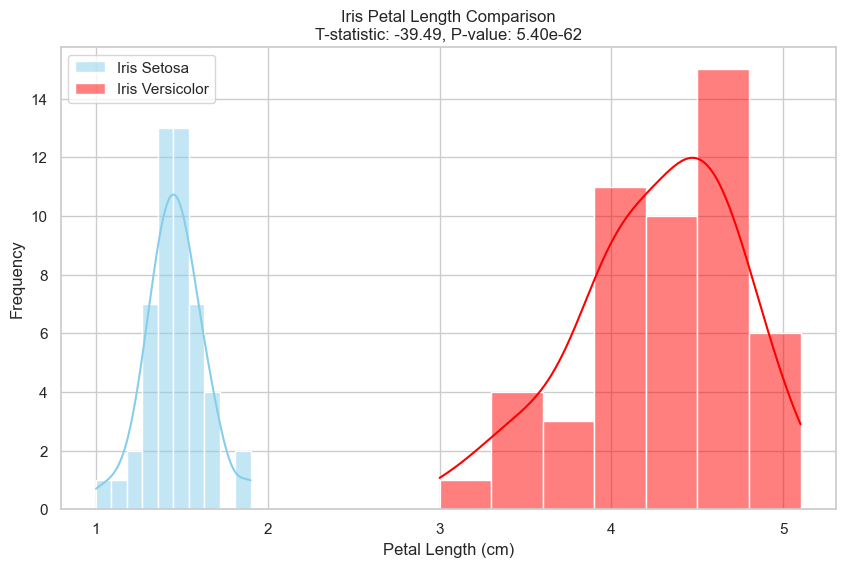

In [66]:
# Plotting the distributions
plt.figure(figsize=(10, 6))
sns.histplot(setosa_petal_length, color="skyblue", label="Iris Setosa", kde=True)
sns.histplot(versicolor_petal_length, color="red", label="Iris Versicolor", kde=True)

# Adding titles and labels
plt.title(f"Iris Petal Length Comparison\nT-statistic: {t_stat:.2f}, P-value: {p_val:.2e}")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.legend()

plt.show()

**Exercice régression linéaire**

Importation and dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Dataset
x = np.array([2, 4, 6, 8, 10])
y = np.array([3, 5, 7, 9, 11])

Perform linear regression

In [80]:

slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

Slope: 1.0
Intercept: 1.0
R-squared: 1.0



The linregress function from scipy.stats performs linear regression on datasets x and y, returning key statistics:

Slope: Indicates the rate of change of y with respect to x. A positive slope means y increases as x increases, while a negative slope means y decreases as x increases.

Intercept: The value of y when x is zero, representing where the regression line crosses the y-axis.

R-squared: The square of the correlation coefficient, showing the proportion of variance in y explained by x. A value close to 1 indicates a strong linear relationship.

P-value: Tests the null hypothesis that the slope is zero. A small p-value (≤ 0.05) suggests a significant linear relationship.

Standard Error: Measures the accuracy of the slope estimate; a smaller value indicates a more precise estimate.

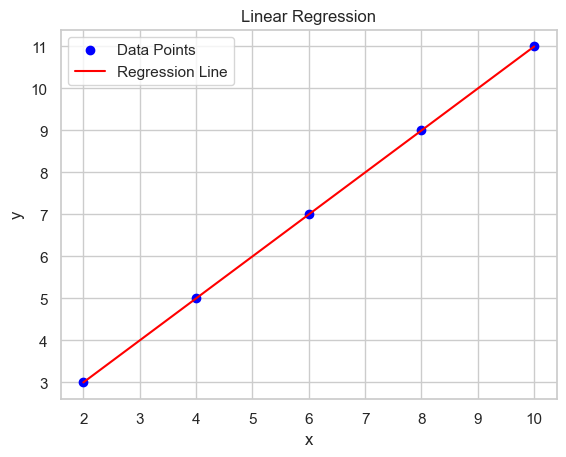

In [79]:
# Plot data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot regression line
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Show plot
plt.show()

In the context of an ANOVA (Analysis of Variance) test, the **null hypothesis** is a statement that assumes there is no effect or no difference among the groups being compared.

**Key Differences between T-test and ANOVA**

-Number of Groups: The T-test is used for comparing two groups, while ANOVA is used for comparing three or more groups.
-Output Statistics: The T-test provides a T-statistic, whereas ANOVA provides an F-statistic.
-Complexity: ANOVA can handle more complex experimental designs, such as those involving multiple factors, while the T-test is limited to simpler comparisons between two groups.